<a href="https://colab.research.google.com/github/TasnimTamanna02/Detecting_Fake_News/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Fake News with PassiveAggressiveClassifier


## Data Handling

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Detecting Fake News/news.csv')
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [16]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


The dataset was loaded from Google Drive into a Pandas DataFrame. It contains 6,335 news articles with the following columns:

*   title - headline of the news article
*   text - full content of the article
*   label - indicates whether the news is REAL or FAKE

The unnecessary index column 'Unnamed: 0' has been removed.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


**Observation:**
*   No missing values were found in any column
*   Data types- title and text column are strings, and label is categorical column.

In [18]:
df['label'].value_counts()

,count
label,
REAL,3171
FAKE,3164


<Axes: xlabel='label', ylabel='count'>

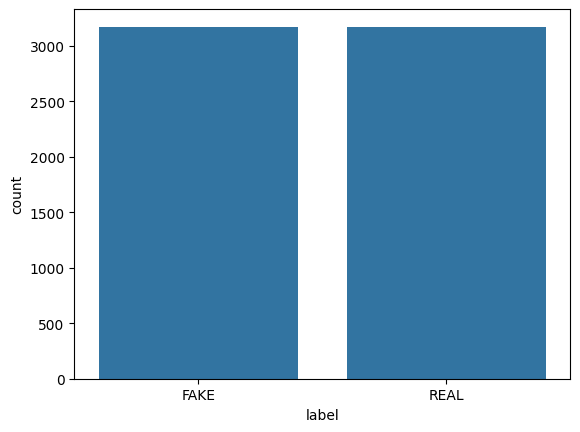

In [19]:
sns.countplot(x='label', data=df)

**Observation:**
The classes are fairly balanced, which reduces the risk of bias toward one label during training.

## Preprocessing

At this stage we standardize the text to reduce noise and allow the model to focus on meanings. Used methods:


*   Lowercasing the texts

*   Removing punctuations, stopwords, URLs, HTML tags and extra spaces
*   Lemmatization


*   TF-IDF Pipeline



### Cleaning

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [21]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [22]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [23]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [word for word in text.split() if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [24]:
df['clean_text'] = df['text'].apply(clean_text)

### Train-Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=5)

In [26]:
tfidf = TfidfVectorizer(max_df=0.7)
tf_train = tfidf.fit_transform(X_train)
tf_test = tfidf.transform(X_test)

## Model Training

In [27]:
clf=PassiveAggressiveClassifier(max_iter=80)
clf.fit(tf_train,y_train)

PassiveAggressiveClassifier(max_iter=80)

In [28]:
y_pred=clf.predict(tf_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       637
        REAL       0.94      0.94      0.94       630

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [29]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[598,  39],
       [ 40, 590]])